<a href="https://colab.research.google.com/github/MrAnish123/diff-eq-project-2/blob/main/SetCCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-20-e04f2fe61811>:75: RuntimeWarning: invalid value encountered in scalar divide
  newVector[i] = newVector[i] / norm


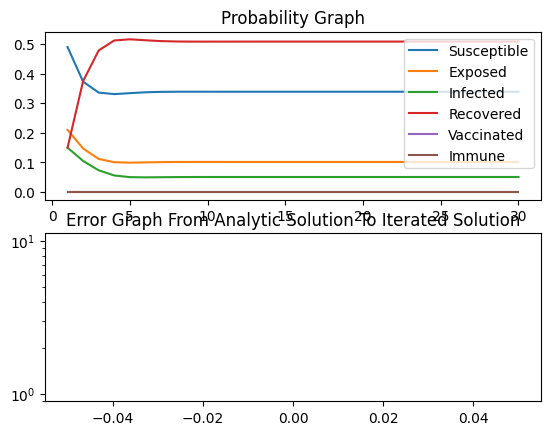

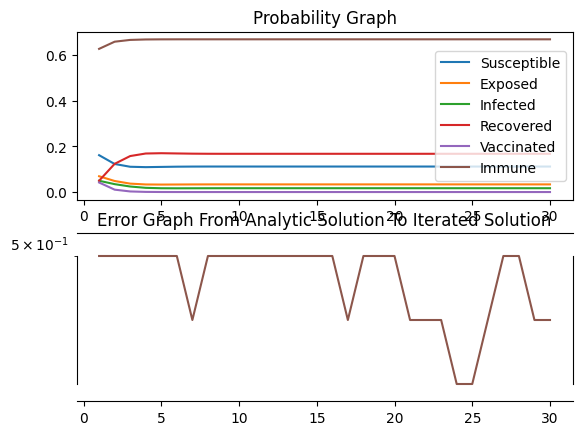

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math



### Task Set C ###


matrixSize = 3

matrix1 = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
matrix2 = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
stateVectorOne = [1, 0, 0, 0,0,0]
stateVectorTwo = [0.33, 0, 0, 0,0.67,0]
setCProbMatrix = [[0.7, 0, 0, 0.2,0,0], [0.3, 0, 0, 0,0,0], [0, 0.5, 0, 0,0,0], [0, 0.5, 1, 0.8,0,0],[0,0,0,0,0.25,0],[0,0,0,0,0.75,1]]


result = [[0,0,0], [0, 0, 0], [0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0]]


def createEmptySquareMatrix(matrixSize : int):
    matrix = [[0 for n in range(matrixSize)] for n in range(matrixSize)]
    return matrix



def matrixMultiplication(matrixSize : int, matrix1 : list, matrix2 : list):
    result = createEmptySquareMatrix(matrixSize)
    for i in range(matrixSize):
        for j in range(matrixSize):
            currentSpot = 0
            for k in range(matrixSize):
                currentSpot += matrix1[i][k] * matrix2[k][j]
            result[i][j] = currentSpot

    return result



def matrixToPower(matrixSize : int, matrix : list, power : int):
    result = matrix
    for n in range(power):
        result = matrixMultiplication(matrixSize, result, matrix)

    return result


#returns new probability state vector
def findProbability(matrixSize : int, transitionMatrix : list, stateVector : list):
    result = [0 for n in range(matrixSize)]
    for i in range(matrixSize):
        currentValue = 0
        for j in range(matrixSize):
            currentValue += transitionMatrix[i][j] * stateVector[j]
        result[i] = currentValue

    return result

def getNorm(vecLength : int, vector : list):

    norm = 0
    for x_i in vector:
        norm += abs(x_i)

    return norm

def getNormalizedVector(vecLength : int, vector : list) -> list:

    norm = getNorm(vecLength, vector)
    newVector = vector

    for i in range(vecLength):
        newVector[i] = newVector[i] / norm

    return newVector


def plotProbability(matrixSize : int, numSteps : int, transitionMatrix : list, stateVector : list, title : str, plotLegend : list):

    fig, ax = plt.subplots(2, 1)


    currentProbVector = [0 for n in range(matrixSize)]
    allProbVectors = []
    errorVectors = []

    currentProbMatrix = transitionMatrix ### createEmptySquareMatrix(matrixSize)
    eigenvalues, eigenvectors = np.linalg.eig(np.array(currentProbMatrix))

    sortedIdx = eigenvalues.argsort()[::-1]
    eigenvectors = eigenvectors[:,sortedIdx]


    c1 = np.linalg.solve(eigenvectors, stateVector)[0]
    xVec_inf_analytic = getNormalizedVector(matrixSize, c1 * eigenvectors[:, 0])

    xVector = [(n + 1) for n in range(numSteps - 1)]

    for i in range(numSteps - 1):
        currentProbMatrix = matrixMultiplication(matrixSize, currentProbMatrix, transitionMatrix)
        currentProbVector = findProbability(matrixSize, currentProbMatrix, stateVector)

        ### Normalize Vectors -- Doesn't seem to be needed, or working ###

        ######################################################
        normedVector = getNormalizedVector(matrixSize, currentProbVector)
        errorVector = getNormalizedVector(matrixSize, xVec_inf_analytic - normedVector)

        allProbVectors.append(normedVector)  ### allProbVectors.append(iterVector)
        errorVectors.append(errorVector)

    for v in range(matrixSize):
        yVector = []
        errorVector = []

        for w in range(numSteps - 1):
            yVector.append(allProbVectors[w][v])
            errorVector.append(errorVectors[w][v])

            ### print(allProbVectors[w-1][v]) ###
        ax[0].plot(xVector, yVector, label = plotLegend[v])
        ax[0].set_title("Probability Graph")

        ax[1].set_title("Error Graph From Analytic Solution To Iterated Solution")
        ax[1].semilogy(xVector, errorVector)


        #ax[0].title(title)
        ax[0].legend()



plotProbability(6, 31, setCProbMatrix, stateVectorOne, "Problem 1", ["Susceptible", "Exposed", "Infected", "Recovered","Vaccinated", "Immune"])
plotProbability(6, 31, setCProbMatrix, stateVectorTwo, "Problem 2", ["Susceptible", "Exposed", "Infected", "Recovered","Vaccinated", "Immune"])
plt.show()